# **Fundamentals of AIML Project 1: _Cardio Good Fitness_**

## **Data Analysis by Jonathan Haupt**

# From the Course Cardio Good Fitness Project - Problem Statement

## Objective
Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.


## Key Concepts to be Explored
Come up with a customer profile (characteristics of a customer) of the different products
Perform univariate and multivariate analyses
Generate a set of insights and recommendations that will help the company in targeting new customers.
 

## Data Dictionary
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

Product - The model no. of the treadmill

Age -  Age of the customer in no of years

Gender - Gender of the customer

Education - Education of the customer in no. of years

Marital Status - Marital status of the customer

Usage - Avg. # times the customer wants to use the treadmill every week

Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)

Income - Income of the customer

Miles- Miles that a customer expects to run

## Importing the tools necessary to preform data analysis and visualization

In [1]:
import pandas as pd #importing pandas for use and manipulation of dataframes
import numpy as np  #importing numpy incase need arises to use its functions
import matplotlib.pyplot as plt  #importing pyplot for visualization
import seaborn as sns  #importing seaborn for visualization
sns.set(color_codes=True)  #this will give nicer backgrounds to the plots
%matplotlib inline
#this will show the plot when code is run

## Importing the dataset to be analyized

In [2]:
cgf = pd.read_csv("CardioGoodFitness.csv") #imports the csv file given for the project

# **Exploratory Data Analysis**

## Check the data head and tail to verify the csv import

In [3]:
cgf.head(10) #this will show the first 10 entries instead of the standard 5, note: the index starts at 0

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


**Observations**: Data is consistant with the information given in the problem statement.

In [4]:
cgf.tail()  #this will show the last 5 entries, note: there are 180 total entries

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


**Observations:** Data was verified using the .head function, this was a secondary check to get more of an idea of how the data looks.

## Verify the column names and that they match the Data Dictionary

In [5]:
cgf.columns #allows for verification of data column names for cross reference to data dictionary

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

**Observations:** Column names and data dictionary match.

## Verify the shape of the data (the number of rows and the number of columns)

In [6]:
cgf.shape #output shows ROWS, Columns

(180, 9)

**Observations:** There are 180 rows and 9 columns.

## Check the data types of the columns

In [7]:
cgf.dtypes #output shows the data types found in each column

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

**Observations:** There are six numerical columns and three catagorical columns.

## Check for any null values in the data

In [8]:
cgf.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Observations:** There are no missing or NaN values, so it will not be necessary to clean the data.

## Begin analysing the quantitavive data

In [9]:
cgf.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observations:** 
There is a lot to learn by looking at the data in this way. We are given the "average" customer overall by looking at the mean for each column (28-29 years old, 15.5 years of education or a Bachelors degree, works out 3-4 times a week, believes their fitness level is average, will travel 103 miles on the mahine a year, and has a yearly income around $53,000-54,000). We can see that those numbers are close to our 50th percentile, so the data does not seem skewed too much in any one direction. We also see that there is a large gap in age of users and income levels, which may prove to be important later in making the customer profile. We do not see the data in regards to which machines each user is using and their gender, which will be important factors later, so analysis will need to be done comparing those catagorical data points to some of these numerical data points.

## Using a pair plot to start looking at correlation between numerical data

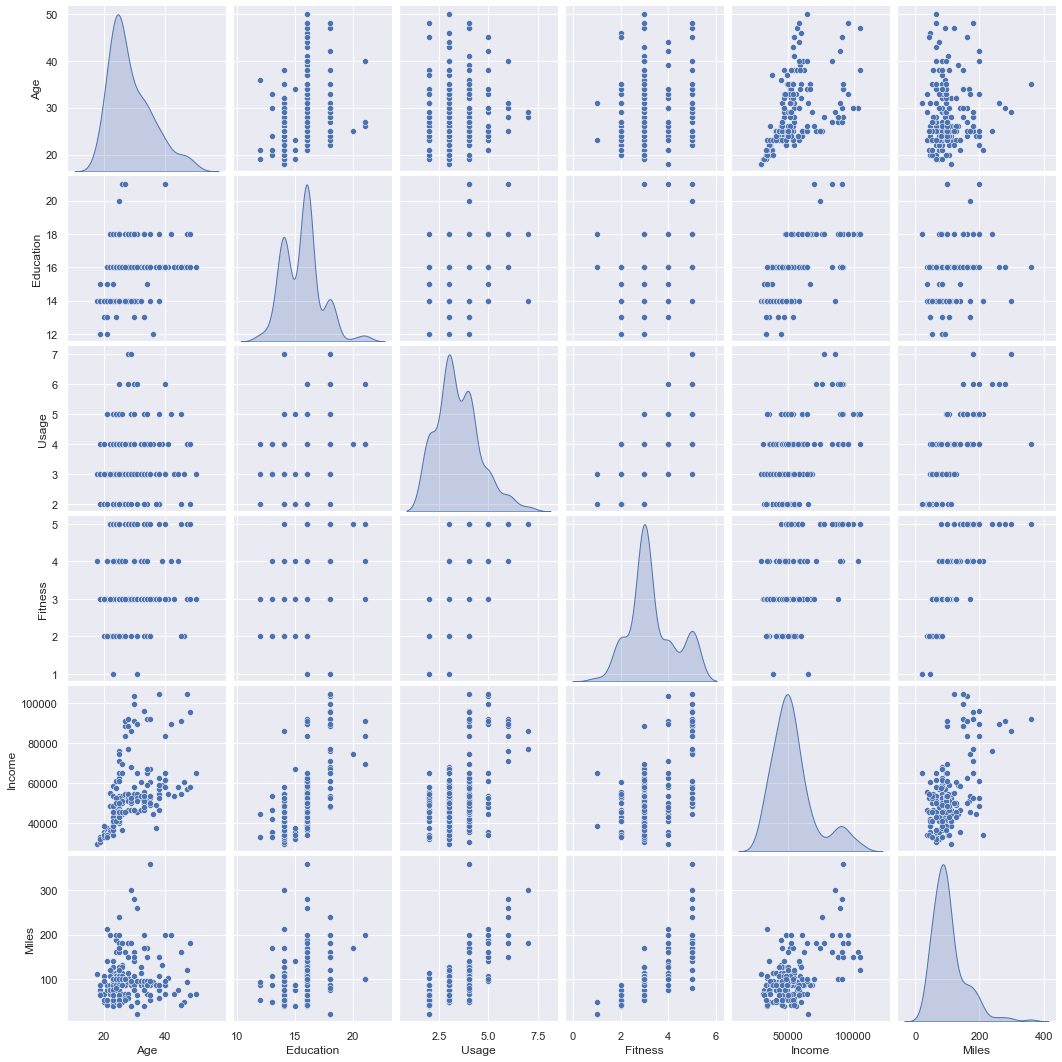

In [10]:
sns.pairplot(cgf, diag_kind="kde") # using the pair plot to give better visual representation of the numerical data columns versus each other

In [11]:
cgf.corr() # shows the correlation in a table format

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

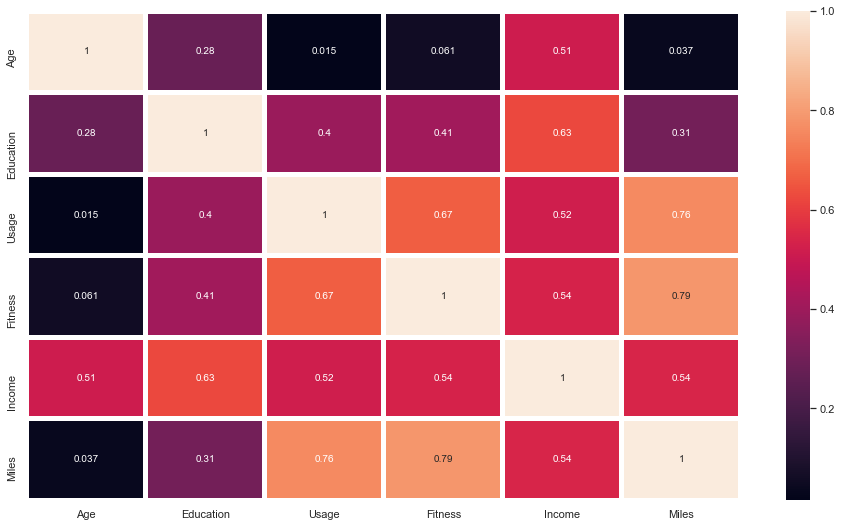

In [12]:
plt.figure(figsize=(16,9)) #this seems to be a fairly standard plot size ratio
 
sns.heatmap(cgf.corr(), annot = True, linewidths=4) #creating a heatmap with gaps in the different sections 

**Observations:**
There is a lot of data here to visually process, but the data trends seem to correlate in a logical fashion. The more education one has the higher their income, the higher the fitness the more miles they travel, the more fit they are the more they use the machine. This data is good, but there is a need to bring the categorical data into the analysis.

## Looking at the data in regards to the machine type, users gender, and marital status

In [13]:
print(cgf.Product.nunique()) #using the .nunique function to see how many different 
print(cgf.Gender.nunique())
print(cgf.MaritalStatus.nunique())

3
2
2


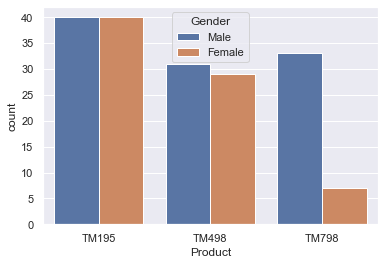

In [14]:
sns.countplot(data = cgf, x='Product',hue='Gender'); #a simple count plot to show how many of each of the three products is owned by each gender

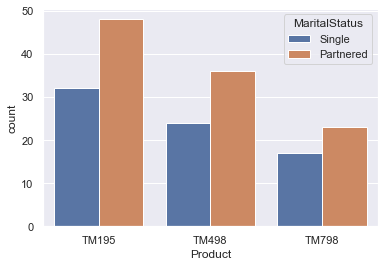

In [15]:
sns.countplot(data = cgf, x='Product',hue='MaritalStatus'); #a simple count plot to show how many of each of the three products is owned by each Marital Status

**Observations:** There are an equal amount of men and women using the TM195, slightly more men the women using the TM498, and far more men then women using the TM798. The total number of products represented in the data set shows there are more TM195 units then TM498 and more TM498 units than TM798, but men own more TM789 than TM498. The Marital Status does not seem to have much effect on the data so the focus will remain on Gender.

## Breaking down the Gender divide with the numerical data

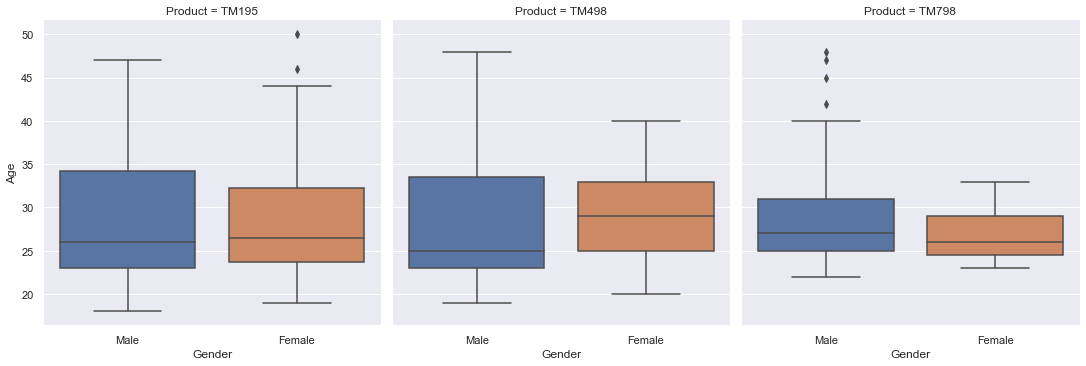

In [16]:
sns.catplot(x="Gender",
               y = "Age",
               col="Product", 
               data=cgf, 
               kind="box");
# The use of catplots allows me to visualize comparisons between males and females across the three product types and the various numerical data columns.

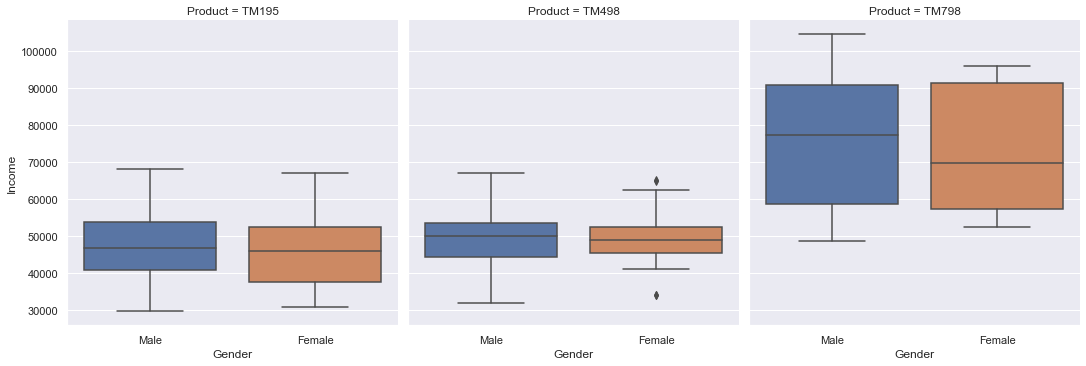

In [17]:
sns.catplot(x="Gender",
               y = "Income",
               col="Product", 
               data=cgf,
               kind="box");

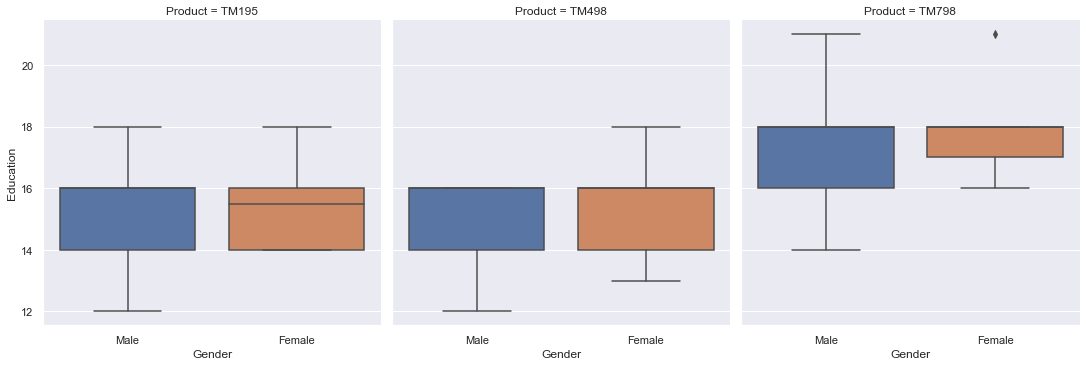

In [18]:
sns.catplot(x="Gender",
               y = "Education",
               col="Product", 
               data=cgf, 
               kind="box");

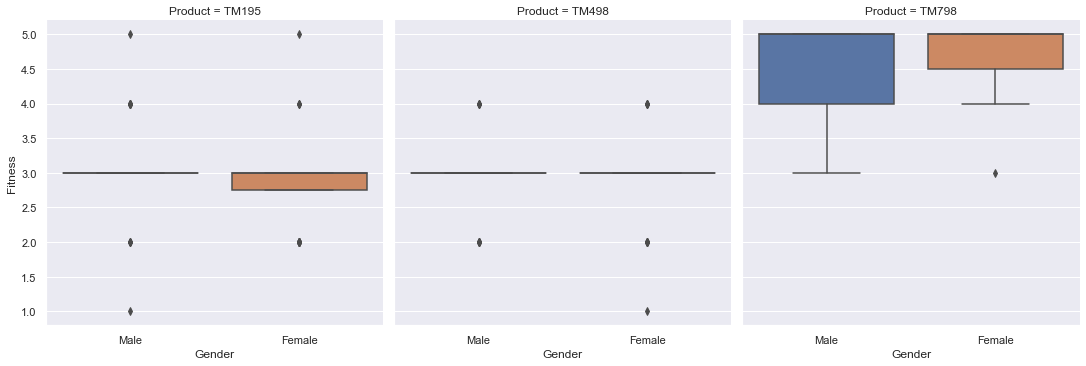

In [19]:
sns.catplot(x="Gender",
               y = "Fitness",
               col="Product", 
               data=cgf, 
               kind="box");

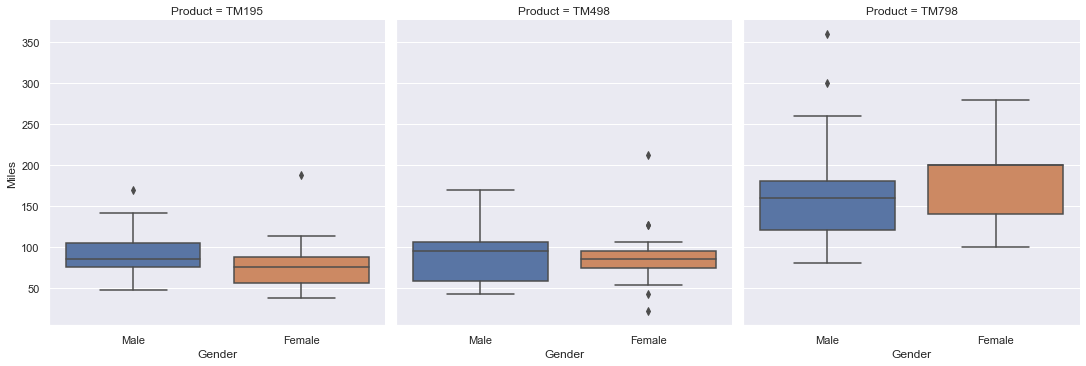

In [20]:
sns.catplot(x="Gender",
               y = "Miles",
               col="Product", 
               data=cgf, 
               kind="box");

**Observations:** The majority of all three product owners fall in the 23-35 age range. The TM798 is prefered by users with higher income and therefore higher eduation. The TM798 also appeals to those who are more fit. The TM195 seems to be a lighter use and easier machine for anyone to use. 

# Conclusion

The biggest deficit in the data is women who own the TM798. As this is shown to appeal to people with a higher fitness level and higher income/education level, it seems a marketing scheme aimed at female ex-collegiant athletes and women who played club sports at the collegiant level would boost sales for the TM798 in the female market. With the higher levels of income associated with the use of the TM798, perhaps a yearly sale to lower the price point would open more oppurtunity for people of lower income to be able to afford the TM798.